In [1]:
#Description: Dollar Cost Average vs Lump Sum

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
df=yf.download('^GSPC',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
...,...,...,...,...,...,...
2023-01-10,3888.570068,3919.830078,3877.290039,3919.250000,3919.250000,3851030000
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,3969.610107,4303360000
2023-01-12,3977.570068,3997.760010,3937.560059,3983.169922,3983.169922,4440260000


Text(0, 0.5, 'Adj. Close price(USD)')

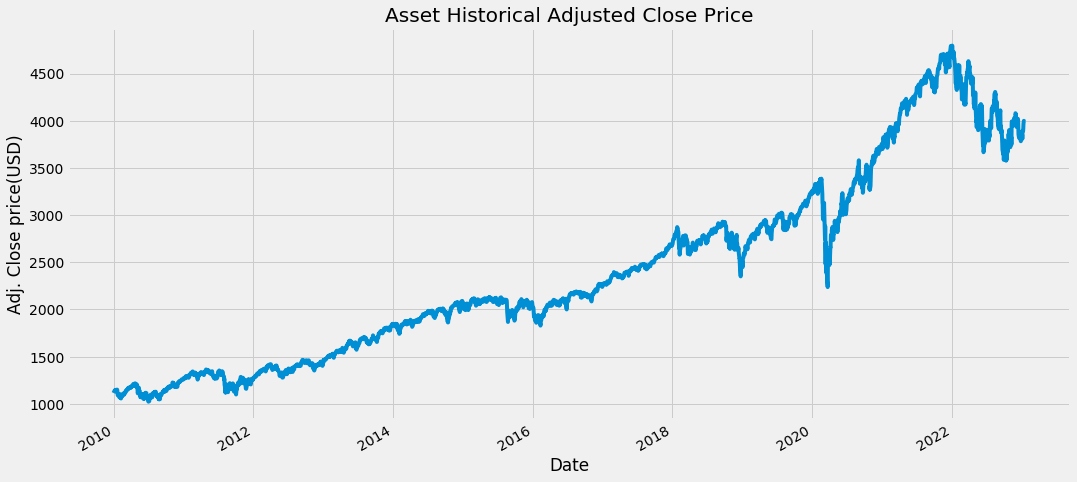

In [4]:
#Visually show the adj close price historical data
df['Adj Close'].plot(figsize=(16,8))
plt.title('Asset Historical Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adj. Close price(USD)')

In [5]:
#Calculate and show the lump sum investment strategy
#Get the adjusted close price from the data set
adj_close_prices=df['Adj Close']
#Choose the initial investment amount
intitial_investment =5000
#Get the latest or last price value of the stock?ETF within this data set
stock_latest_value=adj_close_prices[-1]
#Get the number of shares bought on each date with the hypothetical investment ammount(aka lum sum)
num_shares_bought=intitial_investment/adj_close_prices
#Calculate how much I or you would have according to the last price in the last price in this data set for investing a lump sum on a given date in the past
#investing a lump sum on a given date in the past
lump_sum=stock_latest_value*num_shares_bought
#Show the data
lump_sum

Date
2009-12-31    17895.121774
2010-01-04    17612.556179
2010-01-05    17557.851609
2010-01-06    17548.278661
2010-01-07    17478.344277
                  ...     
2023-01-10     5091.497060
2023-01-11     5026.904233
2023-01-12     5009.791258
2023-01-13     4989.847544
2023-01-17     5000.000000
Name: Adj Close, Length: 3283, dtype: float64

In [6]:
#Compute and show the best and worse day for lump sum investment
print('Lump Sum Investment: ')
print('The best day to invest a $ '+str(intitial_investment)+' lum sum was on '+lump_sum.idxmax().strftime('%b %d %Y')+' and would be worth $'+str(round(lump_sum.max(),2))+' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))
print('The worse day to invest a $ '+str(intitial_investment)+' lum sum was on '+lump_sum.idxmin().strftime('%b %d %Y')+' and would be worth $'+str(round(lump_sum.min(),2))+' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))

Lump Sum Investment: 
The best day to invest a $ 5000 lum sum was on Jul 02 2010 and would be worth $19514.22 on Jan 17 2023
The worse day to invest a $ 5000 lum sum was on Jan 03 2022 and would be worth $4160.24 on Jan 17 2023


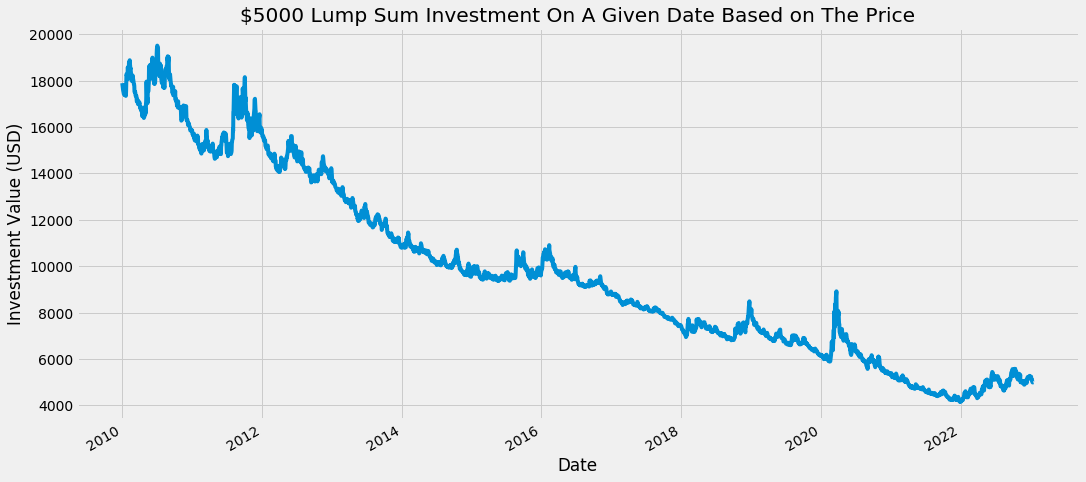

In [7]:
#plot the lump sum data
lump_sum.plot(figsize=(16,8))
plt.title('$'+str(intitial_investment)+' Lump Sum Investment On A Given Date Based on The Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.show()

In [8]:
#Create a function to Calculate the Dollar cost Averaging Strategy
def DCA(start_date,initial_investment):
    #Get the investment period which will be 12
    investment_date_periods=12.0
    #Calculate the portion or amount that we plan to invest for each investment date period
    investment_portion=initial_investment/investment_date_periods
    
    #get the dates of investment periods
    all_investment_dates = pd.date_range(start_date,periods=investment_date_periods,freq='30D')
    
    #get the date up to the last date in our data set
    investment_dates=all_investment_dates[all_investment_dates < df.index[-1]]
    
    #Get the indicies (and turn the dates)within the data set that are the closest to the investment dates
    #to the investment dates
    Closest_investment_dates=df.index.searchsorted(investment_dates)
    
    #Get a lsit of stock prices at the Closest investment date
    stock_prices=df['Adj Close'][Closest_investment_dates]
    
    #Get the total number of shares that we invested in by summing all of the shares 
    #purchased on each of the investment dates
    total_shares_invested=sum(investment_portion/stock_prices)
    
    #Get the cash that was not invested from the initial investment amount
    uninvested_cash=investment_portion*sum(all_investment_dates >= df.index[-1])
    
    #Calculate the total
    total=uninvested_cash+df['Adj Close'][-1]*total_shares_invested
    return total
    

In [9]:
#Execute the DCA function
DCA_list = []
for date in df.index:
    DCA_list.append(DCA(date,intitial_investment))

In [10]:
#Convert the list to a series
#Create a new dataframe
dca=pd.DataFrame()
dca['DCA']=DCA_list
#Set the date as  the index
dca=dca.set_index(pd.DatetimeIndex(df.index))
#Convert the data frame to a series
dca=dca.squeeze()
#show the data
dca

Date
2009-12-31    17837.175571
2010-01-04    17665.931027
2010-01-05    17748.681698
2010-01-06    17753.032197
2010-01-07    17803.036065
                  ...     
2023-01-10     5007.624755
2023-01-11     5002.242019
2023-01-12     5000.815938
2023-01-13     4999.153962
2023-01-17     5000.000000
Name: DCA, Length: 3283, dtype: float64

In [11]:
#Compute and show the best and worse day for lump sum investment
#Compute and show the best and worse day for lump sum investment
print('DCA Investment: ')
print('The best day to start DCA $ '+str(intitial_investment)+' Investment was on '+dca.idxmax().strftime('%b %d %Y')+' and would be worth $'+str(round(dca.max(),2))+' on '+dca.last_valid_index().strftime('%b %d %Y'))
print('The worse day to start DCA $ '+str(intitial_investment)+' Investment was on '+dca.idxmin().strftime('%b %d %Y')+' and would be worth $'+str(round(dca.min(),2))+' on '+dca.last_valid_index().strftime('%b %d %Y'))

DCA Investment: 
The best day to start DCA $ 5000 Investment was on Dec 31 2009 and would be worth $17837.18 on Jan 17 2023
The worse day to start DCA $ 5000 Investment was on Jun 07 2021 and would be worth $4472.15 on Jan 17 2023


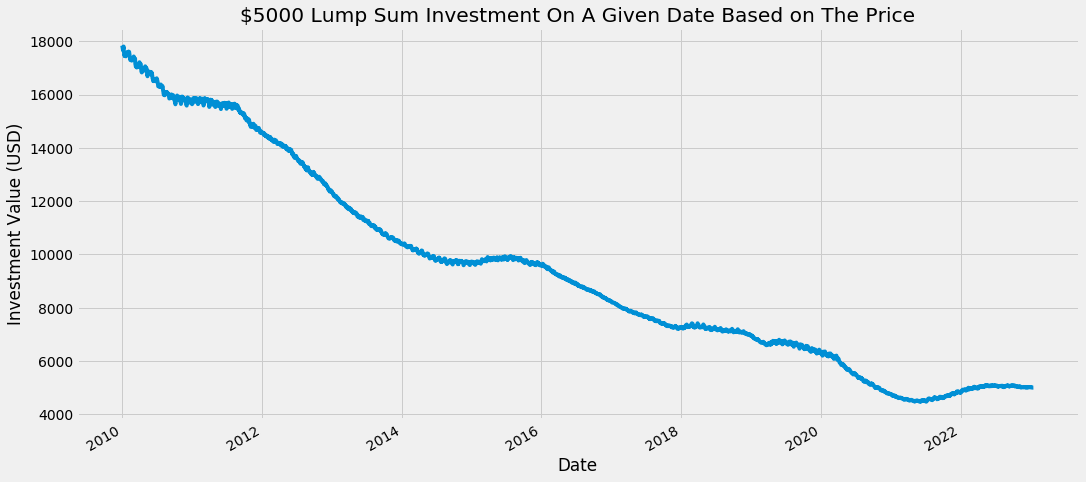

In [12]:
#plot the lump sum data
dca.plot(figsize=(16,8))
plt.title('$'+str(intitial_investment)+' Lump Sum Investment On A Given Date Based on The Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.show()

In [13]:
#get the Volatility
lump_sum_vol=lump_sum.pct_change().std()
dca_vol=dca.pct_change().std()
print('Lump Sum Volatility: ', lump_sum_vol)
print('Dca Volatility: ', dca_vol)

Lump Sum Volatility:  0.011300482160339614
Dca Volatility:  0.0032905025075909053


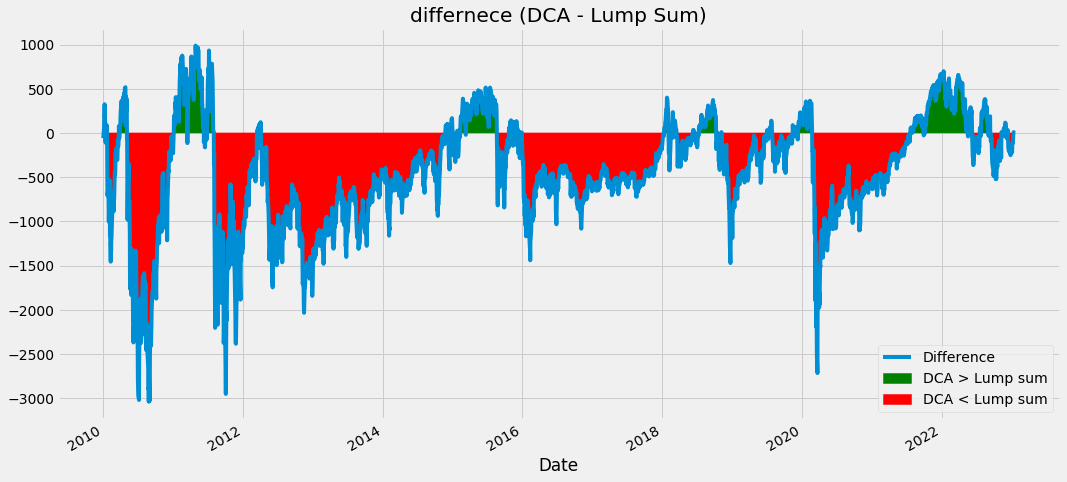

In [14]:
#Get the difference
difference=dca-lump_sum
#plot the difference
difference.plot(figsize=(16,8),label='Difference')
plt.fill_between(difference.index,y1=difference,y2=0,color='green',where=difference>0,label='DCA > Lump sum')
plt.fill_between(difference.index,y1=difference,y2=0,color='red',where=difference<0,label='DCA < Lump sum')
plt.title('differnece (DCA - Lump Sum)')
plt.legend()
plt.show()

In [15]:
#Calculate the win percentages
l_win_pct=round(sum(difference<0)/len(difference)*100,1)
d_win_pct=round(sum(difference>0)/len(difference)*100,1)
print('Lump Sum Investment Strategy Returned more than DCA: '+str(l_win_pct)+'% of the time')
print('DCA returned more than Lump Sum : '+str(d_win_pct)+'% of the time')

Lump Sum Investment Strategy Returned more than DCA: 75.7% of the time
DCA returned more than Lump Sum : 24.2% of the time
